# Importación de librerías y carga de datos

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, spearmanr, pearsonr, mode

In [2]:
from google.colab import files
uploaded = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [3]:
df = pd.read_csv("./online_shoppers_intention.csv")

El dataset [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset) contiene 12330 registros de sesiones (filas), cada una perteneciente a un usuario diferente, para las cuales se recopilan un total de 17 datos (columnas). El objetivo es estudiar la relación entre las métricas de una sesión y la probabilidad de que esta derive en una compra.

# Exploración inicial - base de datos completa

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Selección de columnas

Se observan las diferentes columnas del dataframe con el objetivo de elegir un mínimo de 3 variables continuas y 3 discretas para realizar los análisis posteriores.

In [5]:
data = df[["Administrative","Informational","ProductRelated", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration","ExitRates"]]

In [8]:
# #Guardar tabla depurada
# from google.colab import files

# data.to_csv("columnas_analisis.csv", index=False)
# files.download("columnas_analisis.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Variables - Tabla descriptiva


| Nombre | Tipo | Rango | Definición | Fuente |
|--------|------|-------|------------|--------|
|Administrative|Discreta|[0,27]|Páginas de tipo administrativo visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|Informational|Discreta|[0,24]|Páginas de tipo informativo visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|ProductRelated|Discreta|[0,705]|Páginas relacionadas con productos visitadas por el usuario en la sesión analizada.|Información tomada de la URL durante la navegación|
|Administrative_Duration|Continua|[0, 3398.75]|Tiempo que ha pasado el usuario visitando páginas de tipo administrativo|Información tomada de la URL durante la navegación|
|Informational_Duration|Continua|[0, 2549.375]|Tiempo que ha pasado el usuario visitando páginas de tipo informativo|Información tomada de la URL durante la navegación|
|ProductRelated_Duration|Continua|[0, 63973.52223]|Tiempo que ha pasado el usuario visitando páginas relacionadas a productos|Información tomada de la URL durante la navegación|
|ExitRates|Continua|[0, 0.2]|Se calcula como el porcentaje de todas las visitas a esa página que terminaron <br>siendo la última página vista en la sesión.|Google Analytics|


# Análisis exploratorio (EDA)

## Estadísticos descriptivos por variable

In [10]:
data.describe()

,Administrative,Informational,ProductRelated,Administrative_Duration,Informational_Duration,ProductRelated_Duration,ExitRates
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,0.503569,31.731468,80.818611,34.472398,1194.746220,0.043073
std,3.321784,1.270156,44.475503,176.779107,140.749294,1913.669288,0.048597
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000,0.000000,184.137500,0.014286
50%,1.000000,0.000000,18.000000,7.500000,0.000000,598.936905,0.025156
75%,4.000000,0.000000,38.000000,93.256250,0.000000,1464.157214,0.050000
max,27.000000,24.000000,705.000000,3398.750000,2549.375000,63973.522230,0.200000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Informational            12330 non-null  int64  
 2   ProductRelated           12330 non-null  int64  
 3   Administrative_Duration  12330 non-null  float64
 4   Informational_Duration   12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   ExitRates                12330 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 674.4 KB


In [27]:
for (i, col) in enumerate(data.columns):
  print(f"Variable: {col}")
  print(f"Asimetría: {skew(data[col]):.2f}")
  print(f"Kurtosis: {kurtosis(data[col]):.2f}")
  print("")

Variable: Administrative
Asimetría: 1.96
Kurtosis: 4.70

Variable: Informational
Asimetría: 4.04
Kurtosis: 26.92

Variable: ProductRelated
Asimetría: 4.34
Kurtosis: 31.20

Variable: Administrative_Duration
Asimetría: 5.62
Kurtosis: 50.54

Variable: Informational_Duration
Asimetría: 7.58
Kurtosis: 76.29

Variable: ProductRelated_Duration
Asimetría: 7.26
Kurtosis: 137.12

Variable: ExitRates
Asimetría: 2.15
Kurtosis: 4.01



Según los datos de asimetría y kurtosis, se puede ver una tendencia en las columnas; sesgo positivo o cola hacia la derecha y colas pesadas (unas mucho mas que otras).

## Visualización univariada

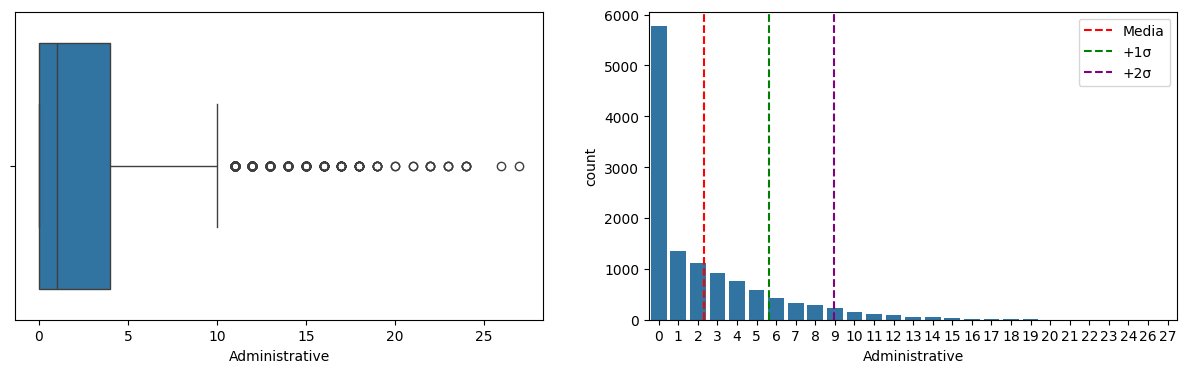

In [16]:
col = "Administrative"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "Administrative":

Del gráfico de barras podemos ver que la gran mayoría de valores son ceros y a medida que aumenta el valor, la frecuencia disminuye.

El boxplot básicamente nos cuenta lo mismo que el gráfico de barras en cuanto al peso de valores bajos como 0 y 1, ya que la línea de Q2 está muy cercana al 0, además nos muestra algunos valores candidatos a ser outliers por encima del valor 10.

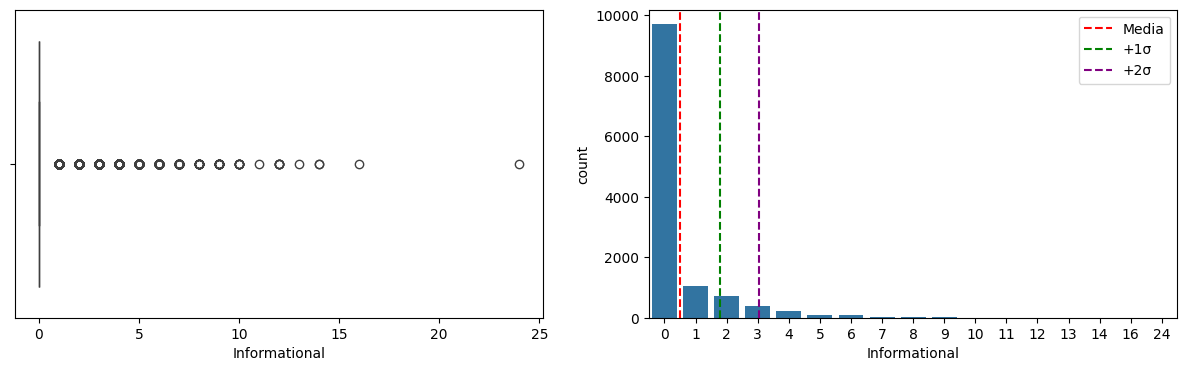

In [17]:
col = "Informational"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "Informational":

Esta variable presenta un comportamiento similar a la anterior aunque todavía más desequilibrado, ya que hay una mayor densidad de valores 0, lo que en el boxplot se traduce como una línea sobre el 0 y sin bigotes en lugar de una caja con bigotes, es decir, todos los valores diferentes de 0 son tomados como outliers según la distribución.

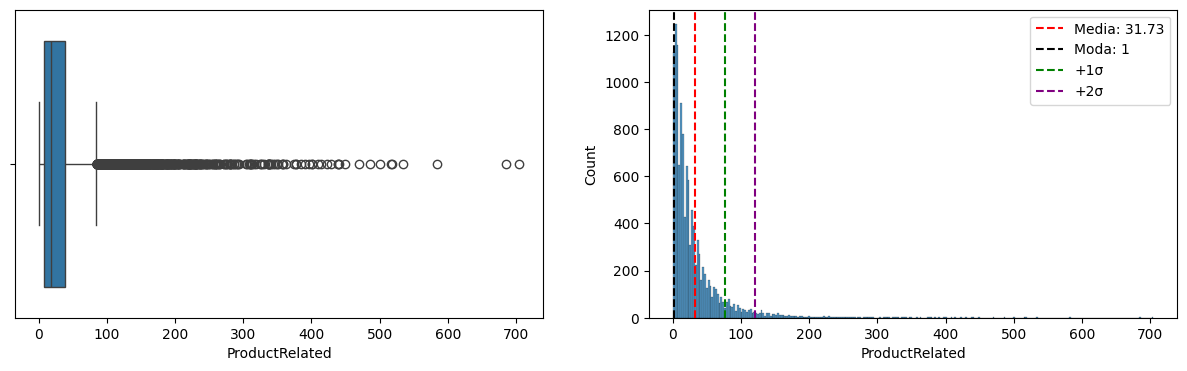

In [34]:
col = "ProductRelated"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
moda = mode(data[col], keepdims=True).mode[0]
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media: {mean:.2f}')
axs[1].axvline(moda, color='black', linestyle='--', label=f'Moda: {moda}')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "ProductRelated":

Las gráficas para esta variable nos cuentan un poco sobre su naturaleza. A simple vista podemos observar que la mayoría de usuarios navega por un número bajo de páginas relacionadas con productos (entre 1 y aproximadamente 35). Es menos frecuente una sesión con numeros altos en esta métrica aunque no deja de ser un comportamiento normal o esperado, teniendo datos en el rango del bigote cercanos a ~90 páginas y muchos datos por encima, con una alta densidad hasta los ~300. Finalmente hay algunos pocos valores entre 450 y 700.

En conclusión el comportamiento de esta variable es bastante heterogéneo con densidad alta para números bajos.

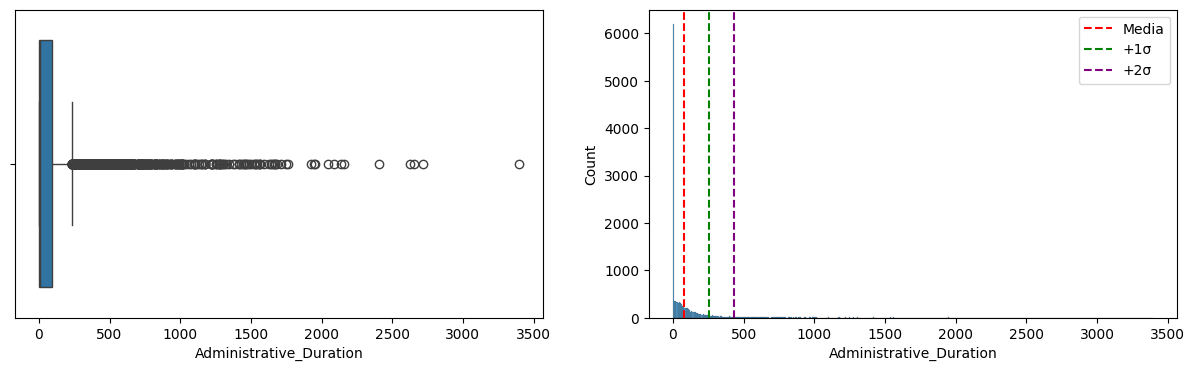

In [19]:
col = "Administrative_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

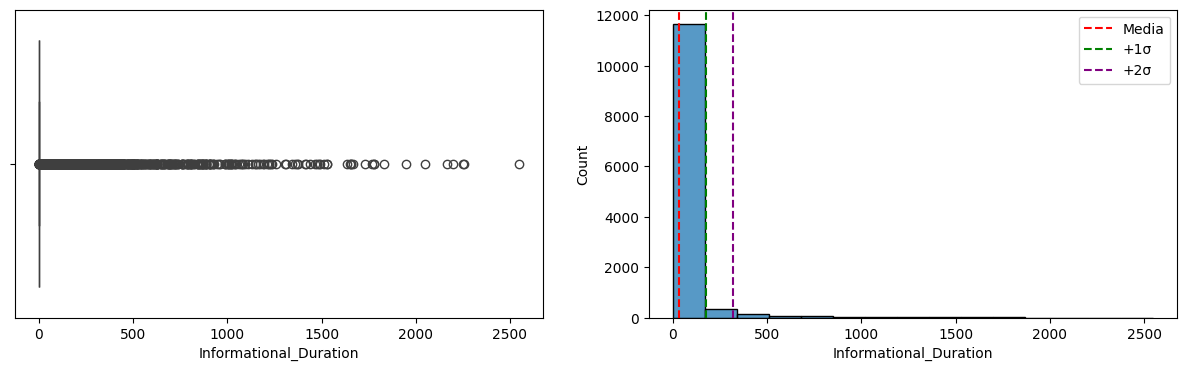

In [20]:
col = "Informational_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

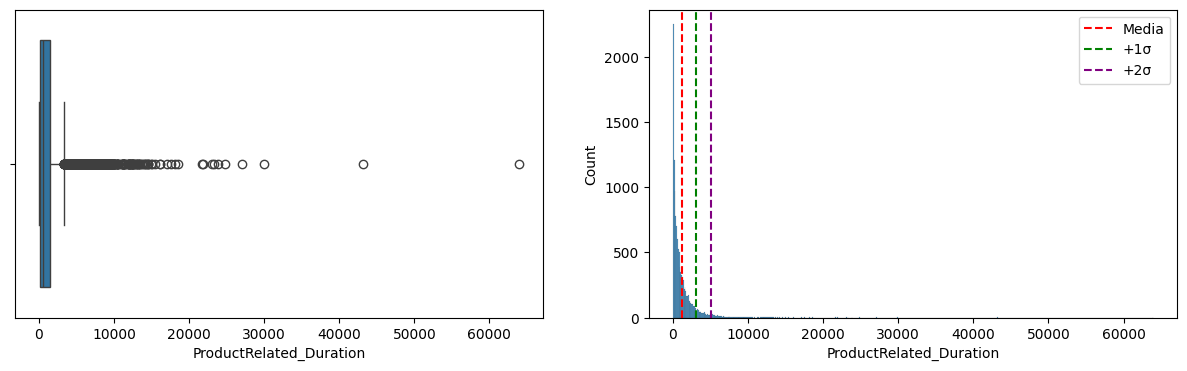

In [21]:
col = "ProductRelated_Duration"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variables "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration":

Estas columnas representan el tiempo total del usuario en cada tipo de página, por lo que su comportamiento es bastante similar al total de páginas visitadas por categoría. Las gráficas muestran una alta densidad en valores bajos, de modo que el límite del rango no atípico del boxplot es bastante bajo y se observan muchos valores por fuera de este.

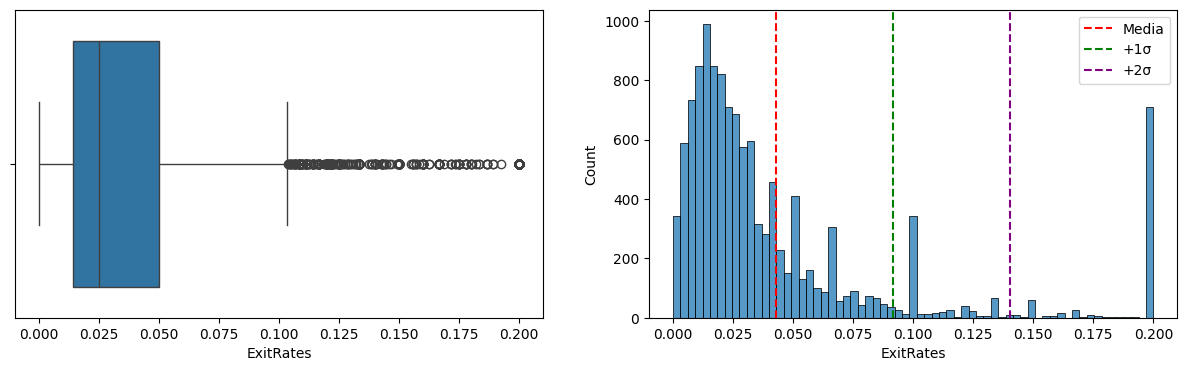

In [28]:
col = "ExitRates"
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.boxplot(data[col], ax=axs[0], orient="h")
sns.histplot(data[col], ax=axs[1])
mean = np.mean(data[col])
std = np.std(data[col])
axs[1].axvline(mean, color='r', linestyle='--', label=f'Media')
axs[1].axvline(mean + std, color='g', linestyle='--', label=f'+1σ')
axs[1].axvline(mean + 2 * std, color='purple', linestyle='--', label=f'+2σ')
axs[1].legend()
plt.show()

Variable "ExitRates":

Esta variable presenta valores entre 0 y 0.2.

El boxplot muestra gran cantidad de valores fuera del bigote, y comparando esto con el histograma, se puede ver que por encima de 0.1 la frecuencia de los distintos rangos tiende a ser baja con la excepción de valores cercanos al extremo 0.2 cuya frecuencia es considerablemente alta. Este comportamiento se puede considerar extraño, una posible explicación es un error en la obtención de los datos.

## Análisis bivariado

In [41]:
for i in range(len(data.columns)-1):
  for j in range(i+1, len(data.columns)):
    rho, _ = spearmanr(data[data.columns[i]], data[data.columns[j]])
    r, _ = pearsonr(data[data.columns[i]], data[data.columns[j]])
    print(f"{data.columns[i]} - {data.columns[j]}")
    print(f"Spearman: {rho:.2f}")
    print(f"Pearson: {r:.2f}")
  print("")

Administrative - Informational
Spearman: 0.37
Pearson: 0.38
Administrative - ProductRelated
Spearman: 0.46
Pearson: 0.43
Administrative - Administrative_Duration
Spearman: 0.94
Pearson: 0.60
Administrative - Informational_Duration
Spearman: 0.36
Pearson: 0.26
Administrative - ProductRelated_Duration
Spearman: 0.42
Pearson: 0.37
Administrative - ExitRates
Spearman: -0.43
Pearson: -0.32

Informational - ProductRelated
Spearman: 0.37
Pearson: 0.37
Informational - Administrative_Duration
Spearman: 0.36
Pearson: 0.30
Informational - Informational_Duration
Spearman: 0.95
Pearson: 0.62
Informational - ProductRelated_Duration
Spearman: 0.37
Pearson: 0.39
Informational - ExitRates
Spearman: -0.19
Pearson: -0.16

ProductRelated - Administrative_Duration
Spearman: 0.43
Pearson: 0.29
ProductRelated - Informational_Duration
Spearman: 0.36
Pearson: 0.28
ProductRelated - ProductRelated_Duration
Spearman: 0.88
Pearson: 0.86
ProductRelated - ExitRates
Spearman: -0.52
Pearson: -0.29

Administrative_Dura

En la casilla anterior se puede observar que hay valores significativos de Pearson y Spearman únicamente entre las variables que cuentan las visitas a un tipo de página y las que totalizan el tiempo de estadía en cada tipo. En el caso particular de "ProductRelated" y "ProductRelated_Duration" se observa una relación lineal mas fuerte.

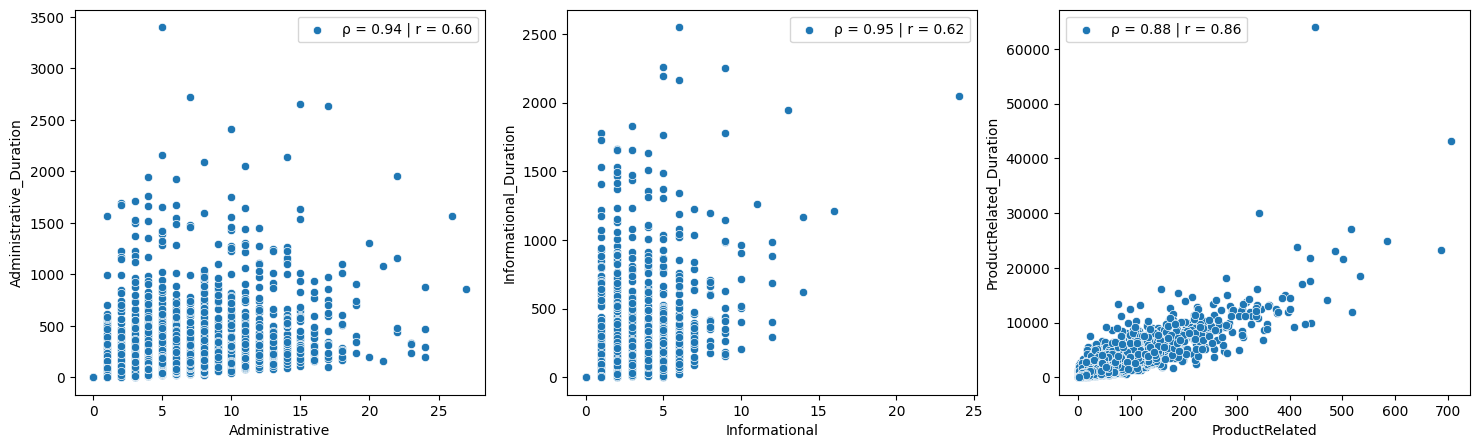

In [9]:
variables = [
    ("Administrative","Administrative_Duration"),
    ("Informational","Informational_Duration"),
    ("ProductRelated","ProductRelated_Duration")
]
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i in range(3):
  rho, _ = spearmanr(data[variables[i][0]], data[variables[i][1]])
  r, _ = pearsonr(data[variables[i][0]], data[variables[i][1]])
  sns.scatterplot(x=data[variables[i][0]], y=data[variables[i][1]], ax=axs[i], label=f"ρ = {rho:.2f} | r = {r:.2f}")
plt.show()

En las casilla anterior se puede observar baja linealidad en las gráficas de "Administrative" e "Informational", lo cual está respaldado por el coeficiente de Pearson; aunque es claro que hay una relación directa ya que se puede esperar que a mayor número de páginas visitadas de un tipo, mayor sea el tiempo total en esas páginas; por lo tanto, podemos ver un coeficiente de Spearman bastante alto en las tres gráficas.

Con respecto a la tercera gráfica, que corresponde a "ProductRelated", esta permite ver tanto en la distribución como en el coeficiente de Pearson, una clara relación lineal.

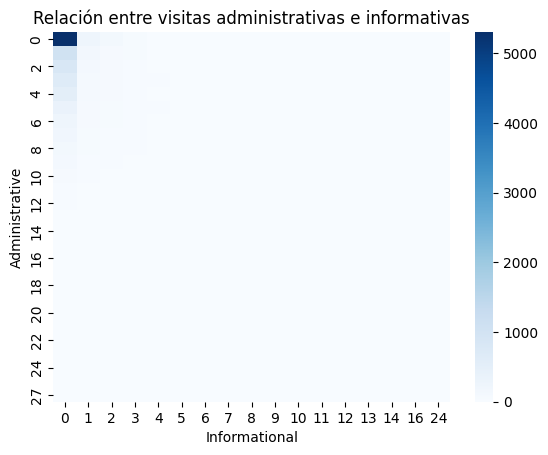

In [39]:
ct = pd.crosstab(data["Administrative"], data["Informational"])
sns.heatmap(ct, annot=False, cmap="Blues", norm=None)
plt.xlabel("Informational")
plt.ylabel("Administrative")
plt.title("Relación entre visitas administrativas e informativas")
plt.show()

De lo anterior podemos concluir que no hay una relacion entre la cantidad de páginas informativas y la cantidad de págionas administrativas que se visitan en una sesión. Únicamente se puede ver que hay una gran cantidad de sesiones que no visitan ninguno de los 2 tipos de páginas, sin embargo, que se visiten muchas páginas de un tipo no significa que se visiten muchas del otro.

<Figure size 1000x800 with 0 Axes>

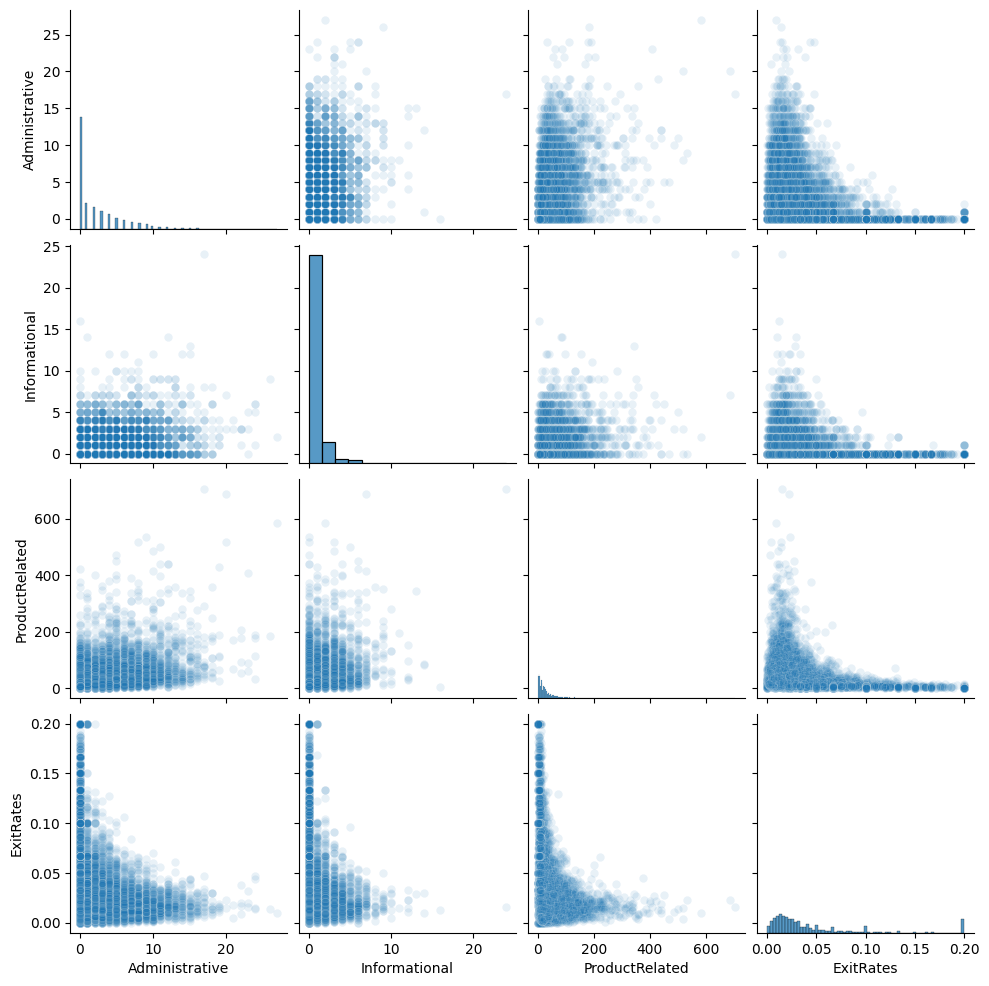

In [43]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[["Administrative","Informational","ProductRelated","ExitRates"]],plot_kws={"alpha":0.1})
plt.show()

Analizando estas gráficas una a una, podemos observar que:


*   Las 3 variables "Administrative", "Informational" y "ProductRelated" guardan una relación monótona leve y muestran alta densidad en valores bajos.
*   Al analizar la variable "ExitRates" con las otras tres, se observa un comportamiento consistente; a mayor tasa de salida, disminuye la cantidad de páginas visitadas en todos los tipos de página. Esto podría deberse a que aquellos usuarios que navegan en una mayor cantidad de páginas, no finalizan su sesión en el e-commerce sino que continuan navegando; mientras que aquellos que navegan poco, tienen mayor probabilidad de terminar su sesión en esa página.





<Figure size 1000x800 with 0 Axes>

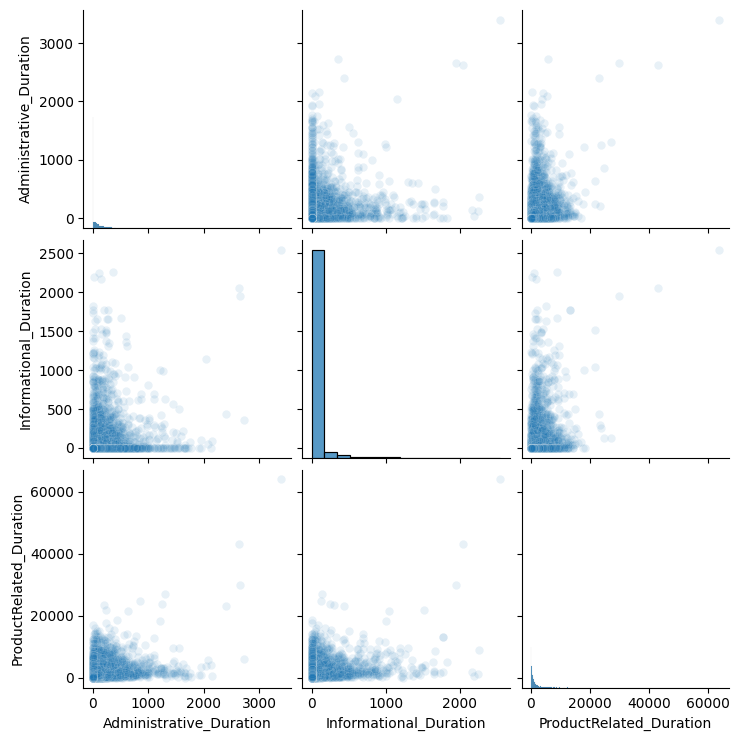

In [44]:
plt.figure(figsize=(10, 8))
sns.pairplot(data[["Administrative_Duration","Informational_Duration","ProductRelated_Duration"]],plot_kws={"alpha":0.1})
plt.show()

En estas gráficas, analizando las relaciones entre los tiempos de duración en cada tipo de páginas, se puede ver que:


*   Analizando "ProductRelated_Duration" con "Administrative_Duration" e "Informational_Duration", presenta valores altos cuando la otra variable tambien presenta valores altos, es decir que hay una relación lineal para valores altos.

*   En valores bajos no se observa una tendencia similar ya que las 3 variables tienen una alta densidad en esa zona.



## Análisis multivariado

### Correlaciones

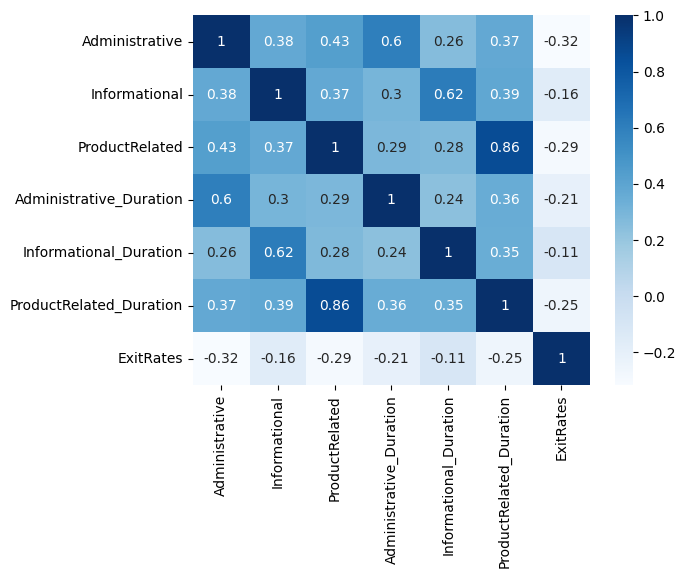

In [46]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap="Blues", norm=None)
plt.show()

Esta gráfica de correlaciones respalda las conclusiones realizadas hasta el momento y a lo largo del análisis.

### PCA

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

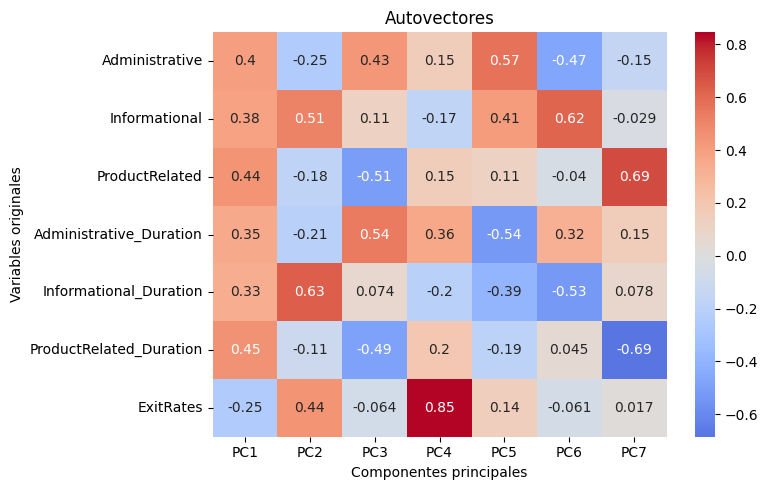

Ecuaciones de los componentes principales:

PC1 = 0.4·'Administrative' + 0.384·'Informational' + 0.442·'ProductRelated' + 0.353·'Administrative_Duration' + 0.333·'Informational_Duration' + 0.448·'ProductRelated_Duration' + -0.246·'ExitRates'
PC2 = -0.245·'Administrative' + 0.509·'Informational' + -0.176·'ProductRelated' + -0.207·'Administrative_Duration' + 0.632·'Informational_Duration' + -0.107·'ProductRelated_Duration' + 0.442·'ExitRates'
PC3 = 0.431·'Administrative' + 0.111·'Informational' + -0.51·'ProductRelated' + 0.539·'Administrative_Duration' + 0.074·'Informational_Duration' + -0.492·'ProductRelated_Duration' + -0.064·'ExitRates'
PC4 = 0.151·'Administrative' + -0.17·'Informational' + 0.147·'ProductRelated' + 0.361·'Administrative_Duration' + -0.203·'Informational_Duration' + 0.197·'ProductRelated_Duration' + 0.846·'ExitRates'
PC5 = 0.569·'Administrative' + 0.415·'Informational' + 0.112·'ProductRelated' + -0.535·'Administrative_Duration' + -0.388·'Informational_Duration' + -0.18

In [55]:
# Matriz de componentes
componentes = pd.DataFrame(pca.components_.T,
                           columns=[f'PC{i+1}' for i in range(7)],
                           index=data.columns)

# 📐 Visualización de autovectores
plt.figure(figsize=(8, 5))
sns.heatmap(componentes, annot=True, cmap='coolwarm', center=0)
plt.title('Autovectores')
plt.ylabel('Variables originales')
plt.xlabel('Componentes principales')
plt.tight_layout()
plt.show()

# Ecuaciones de los componentes principales con nombres reales
print("Ecuaciones de los componentes principales:\n")
for i, comp in enumerate(componentes.columns):
    pesos = pca.components_[i]
    ecuacion = " + ".join([f"{round(pesos[j], 3)}·'{data.columns[j]}'" for j in range(len(pesos))])
    print(f"{comp} = {ecuacion}")

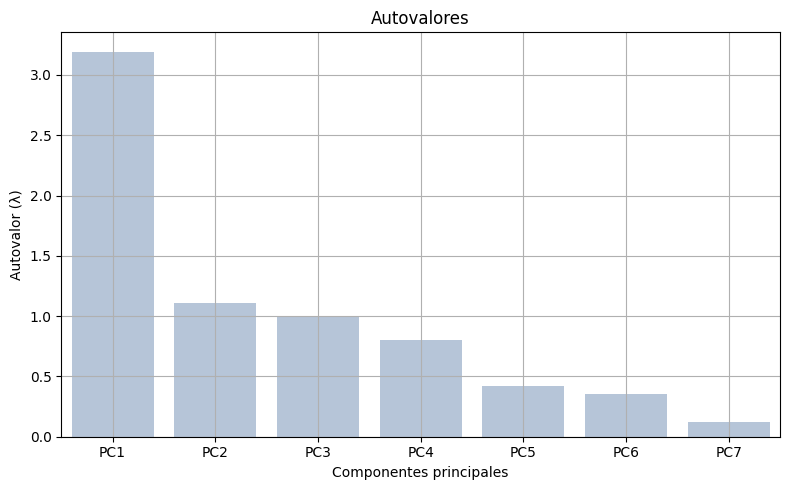

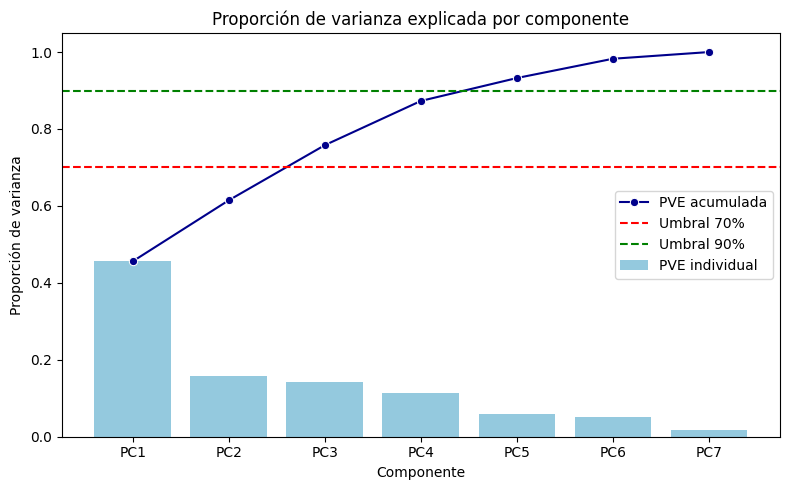

In [56]:
# Varianza explicada
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

# DataFrame para visualización
df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

# Autovalores
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True)
plt.tight_layout()
plt.show()


# Proporción de varianza explicada
plt.figure(figsize=(8, 5))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente')
plt.ylabel('Proporción de varianza')
plt.legend()
plt.tight_layout()
plt.show()

Según el análisis de componentes principales PCA, para este conjunto de datos se puede reducir el número de variables de 7 a 4 explicando casi el 90% de variabilidad.

## Detección de atípicos

### IQR y Z-Scores

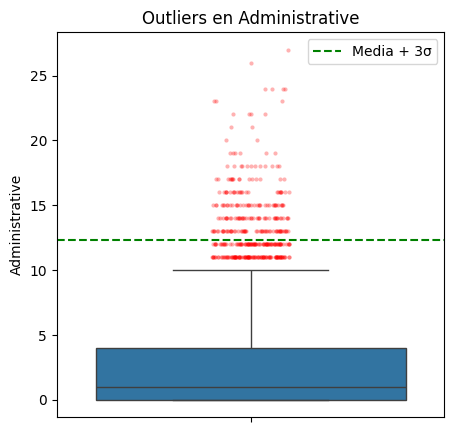

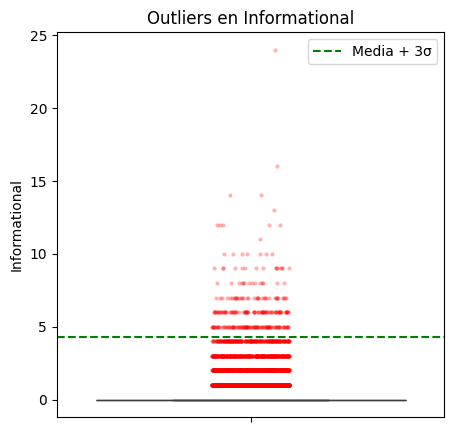

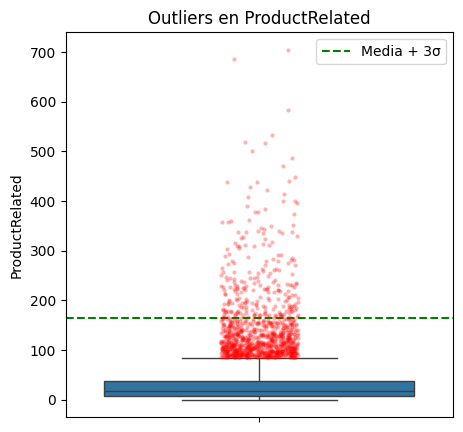

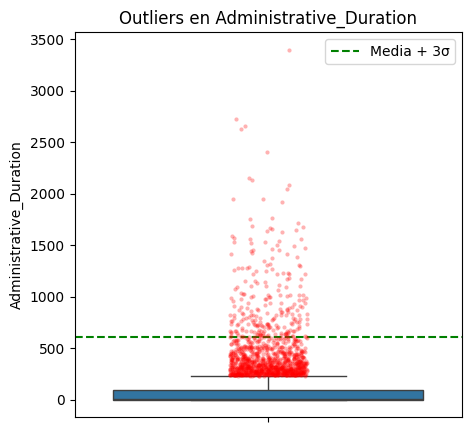

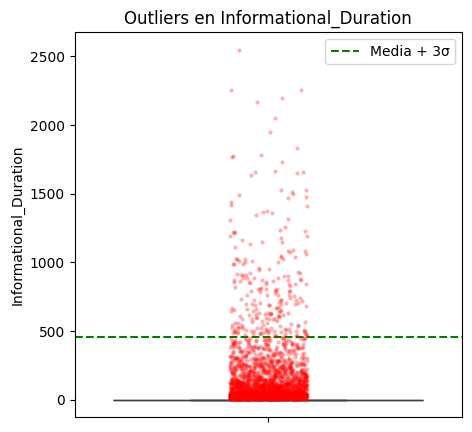

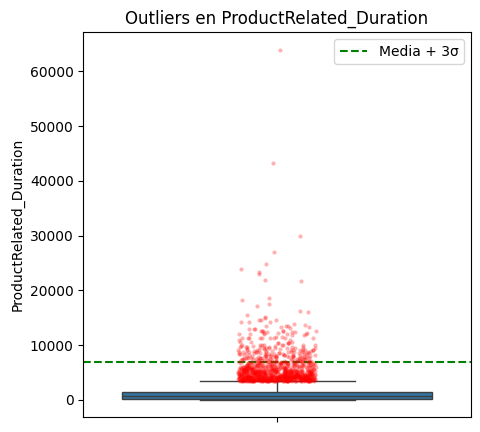

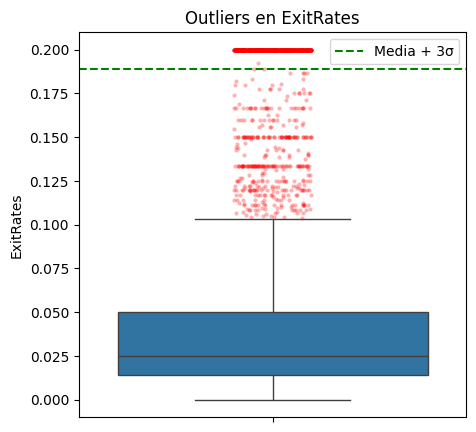

In [92]:
for col in data.columns:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  z_3 = np.mean(data[col] + 3 * np.std(data[col]))
  outliers = data[data[col] > upper_bound][col]
  plt.figure(figsize=(5, 5))
  sns.boxplot(data[col],fliersize=0)
  sns.stripplot(y=outliers, color="red", jitter=True, alpha=0.3, size=3)
  plt.axhline(z_3, color='g', linestyle='--', label=f'Media + 3σ')
  plt.legend()
  plt.title(f"Outliers en {col}")
  plt.show()

Por IQR con Q3 + 1.5*IQR:
*   Debido a que todas las variables presentan densidades muy altas en valores bajos cercanos a cero, el límite superior para el cálculo de valores atípicos se hace muy bajo, por lo que hay una gran cantidad de valores por fuera. Para no etiquetar erroneamente algún valor como outlier, se hace necesario ajustar el cálculo del límite o usar una técnica por clustering.

Por Z-scores con Z>3:
*   Esta técnica muestra mas tolerancia que IQR, sin embargo, para la mayoría de variables (todas excepto "ExitRates" que tiene un comportamiento particular) permanecen fuera del rango una gran cantidad de datos con densidades considerables. Esto respalda la afirmación anterior de usar una técnica de clustering
*   Para "ExitRates", la gran mayoría de datos entran en el rango Z<3, sin embargo, fuera del rango está el valor de tasa de salida igual a 0.2, que como vimos en el análisis univariado, tiene una de las frecuencias mas altas de la columna. Por lo tanto, asumiendo que los datos son correctos, se podría concluir que "ExitRates" no presenta valores atípicos.

### Isolation Forest

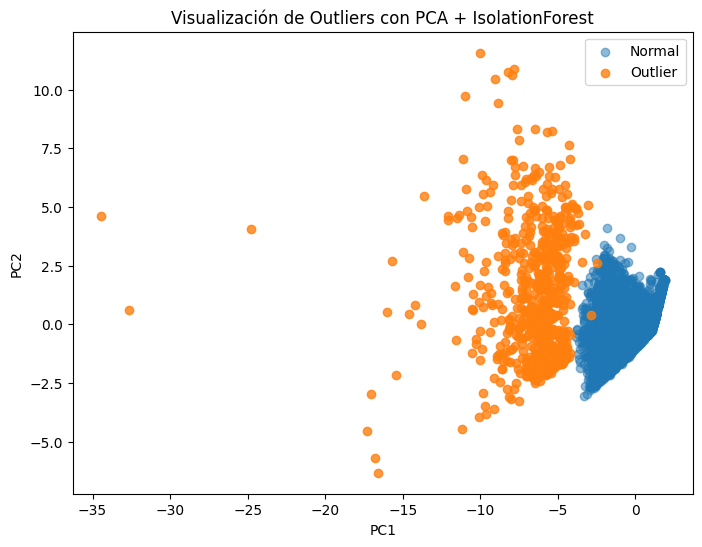

Número de outliers encontrados: 617


In [114]:
from sklearn.ensemble import IsolationForest


scaler = StandardScaler()
iso_data = data.copy()
data_scaled = scaler.fit_transform(iso_data)
iso = IsolationForest(contamination=0.05, random_state=42)
iso_data["outlier_iso"] = iso.fit_predict(data_scaled)


#PCA a 2 componentes para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[iso_data["outlier_iso"] == 1, 0], data_pca[iso_data["outlier_iso"] == 1, 1],
            label="Normal", alpha=0.5)
plt.scatter(data_pca[iso_data["outlier_iso"] == -1, 0], data_pca[iso_data["outlier_iso"] == -1, 1],
            label="Outlier", alpha=0.8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualización de Outliers con PCA + IsolationForest")
plt.legend()
plt.show()

print("Número de outliers encontrados:", np.sum(iso_data["outlier_iso"] == -1))


Luego de aplicar Isolation Forest se encuentran 617 registros atípicos, aproximadamente un 5% del total de registros.

Dado que la toma de muestras se realiza a través del software de manera uniforme y automática, los valores atípicos se podrían explicar por situaciones particulares de los usuarios en cada sesión, por ejemplo, un usuario que navega mientras se encuentra en una reunión, o con una conexión lenta, etc. Por lo tanto me parece correcto eliminar estos registros del dataset.